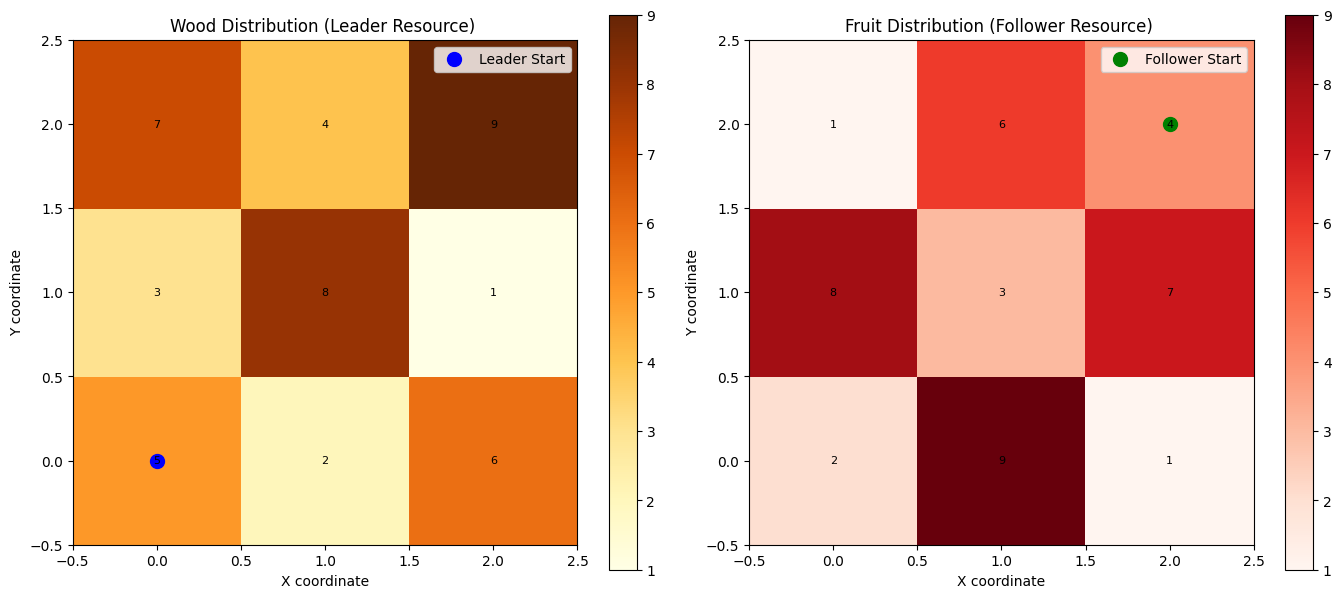

In [9]:
from src.forest_game import ForestCollectionMDP
import numpy as np

# Create custom forest map
forest_map = np.array([
    [[5, 2], [3, 8], [7, 1]],
    [[2, 9], [8, 3], [4, 6]],
    [[6, 1], [1, 7], [9, 4]]
])

# Initialize game
game = ForestCollectionMDP(
    grid_size=(3, 3),
    forest_map=forest_map,
    leader_start=(0, 0),
    follower_start=(2, 2),
    max_steps_leader=1,
    max_steps_follower=1,
)

# Visualize the forest
game.visualize_forest()





Solution Statistics (fruit_avoidance):
  Solve time: 0.000s
  Nodes evaluated: 13
  Cache hits: 0
  Pruned branches: 0
  Game tree depth: 2
  Final payoffs: Leader=5.00, Follower=7.00


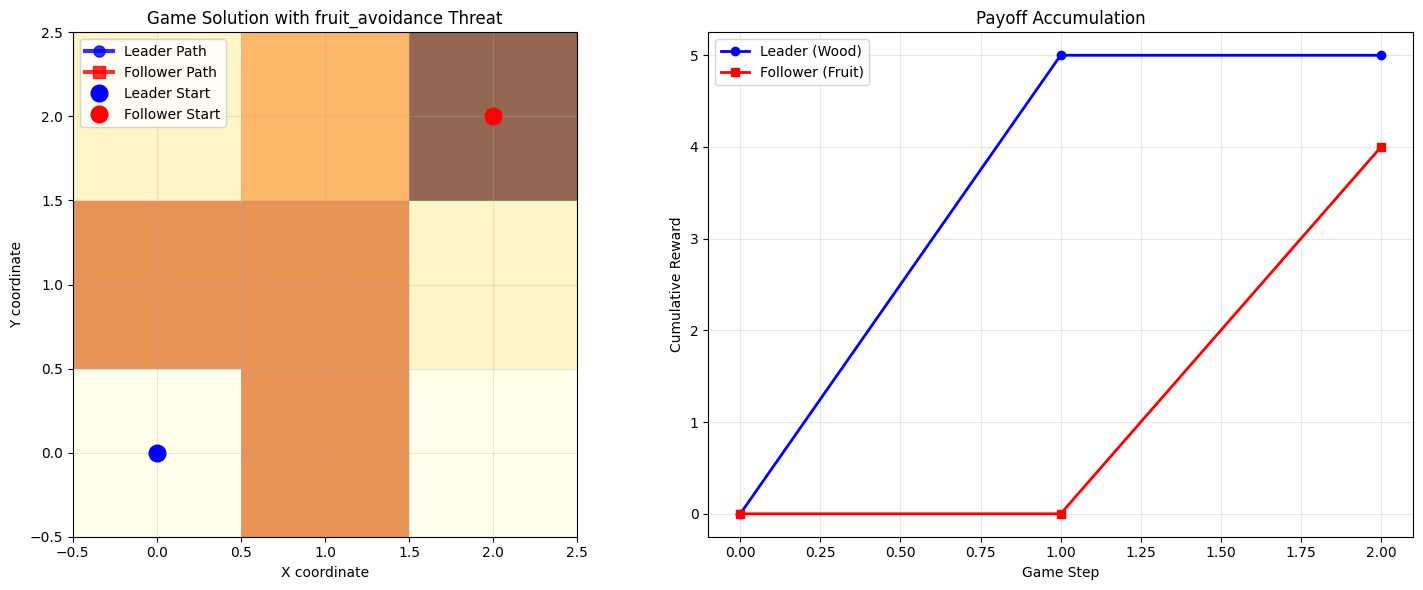

In [11]:
from src.solvers.game_tree_solver import SequentialGameTreeSolver

# Create solver
solver = SequentialGameTreeSolver(game, max_depth=15)
leader_payoff, follower_payoff, actions = solver.solve_with_threats('fruit_avoidance', leader_starts=False)
solver.visualize_solution(actions, game.get_initial_state())